# Using Alpha Vantage API to Analyse Financial Data
In this section I will use Alpha Vantage API to analyze forex data. Let's first import some required libraries. To use any API we are generally required to pass an API key with the search parameters. So, for AlphaVantageAPI we can get one from https://www.alphavantage.co/. In this approach I'll rather use a library by RomellTorres to explore the AlphaVantageAPI, and not the API site.
Let's begin.

In [160]:
import pandas as pd        #for dataframe visualization
from alpha_vantage.foreignexchange import ForeignExchange as FX    #library to use AlphaVantageAPI without link requests

* The alpha_vantage Library is the library I'm going to use to interact with Alpha Vantage API. Full documentation is available at https://github.com/RomelTorres/alpha_vantage. 

In [161]:
APIkey = 'ABC'

* We'll replace 'ABC' with our API key

In [165]:
fx = FX(key="APIkey")   # defining the forex instance

In [166]:
pd.set_option("display.max_rows", 500)    # optional, to display all the rows of the dataframe

In [168]:
data = fx.get_currency_exchange_intraday(from_symbol='EUR', to_symbol='USD', interval='60min', outputsize='full')

* In the just above cell I passed the parameters to get the intraday data of EURUSD currency pair, and the time interval is set to 1h.

In [171]:
type(data)

tuple

* The data retreived is a tuple. Let's convert it to a datframe for our future operations.

In [175]:
df = pd.DataFrame(data)

In [176]:
df

,2021-02-25 11:00:00,2021-02-25 10:00:00,2021-02-25 09:00:00,2021-02-25 08:00:00,2021-02-25 07:00:00,2021-02-25 06:00:00,2021-02-25 05:00:00,2021-02-25 04:00:00,2021-02-25 03:00:00,2021-02-25 02:00:00,...,2020-12-31 05:00:00,2020-12-31 04:00:00,2020-12-31 03:00:00,1. Information,2. From Symbol,3. To Symbol,4. Last Refreshed,5. Interval,6. Output Size,7. Time Zone
0,"{'1. open': '1.2220', '2. high': '1.2231', '3....","{'1. open': '1.2208', '2. high': '1.2223', '3....","{'1. open': '1.2187', '2. high': '1.2208', '3....","{'1. open': '1.2181', '2. high': '1.2189', '3....","{'1. open': '1.2178', '2. high': '1.2182', '3....","{'1. open': '1.2176', '2. high': '1.2183', '3....","{'1. open': '1.2169', '2. high': '1.2177', '3....","{'1. open': '1.2159', '2. high': '1.2170', '3....","{'1. open': '1.2157', '2. high': '1.2163', '3....","{'1. open': '1.2162', '2. high': '1.2165', '3....",...,"{'1. open': '1.2291', '2. high': '1.2291', '3....","{'1. open': '1.2289', '2. high': '1.2294', '3....","{'1. open': '1.2306', '2. high': '1.2309', '3....",NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,FX Intraday (60min) Time Series,EUR,USD,2021-02-25 11:00:00,60min,Full size,UTC


So, just above is the output. And, it's quite confusing. Last 7 columns comprise different information. Let's separate them to have a clear idea of the information in these columns.

In [177]:
df[df.columns[-7:]]

,1. Information,2. From Symbol,3. To Symbol,4. Last Refreshed,5. Interval,6. Output Size,7. Time Zone
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,FX Intraday (60min) Time Series,EUR,USD,2021-02-25 11:00:00,60min,Full size,UTC


These columns represent the parameters that we passed with our query to fetch data about the currency pair. The data of our interest lies in the columns before these columns. So, I'll leave these columns as alone and select the rest of columns.

In [179]:
df_col = df.iloc[0, 0:-7]

In [181]:
df_col

2021-02-25 11:00:00    {'1. open': '1.2220', '2. high': '1.2231', '3....
2021-02-25 10:00:00    {'1. open': '1.2208', '2. high': '1.2223', '3....
2021-02-25 09:00:00    {'1. open': '1.2187', '2. high': '1.2208', '3....
2021-02-25 08:00:00    {'1. open': '1.2181', '2. high': '1.2189', '3....
2021-02-25 07:00:00    {'1. open': '1.2178', '2. high': '1.2182', '3....
                                             ...                        
2020-12-31 07:00:00    {'1. open': '1.2289', '2. high': '1.2293', '3....
2020-12-31 06:00:00    {'1. open': '1.2286', '2. high': '1.2297', '3....
2020-12-31 05:00:00    {'1. open': '1.2291', '2. high': '1.2291', '3....
2020-12-31 04:00:00    {'1. open': '1.2289', '2. high': '1.2294', '3....
2020-12-31 03:00:00    {'1. open': '1.2306', '2. high': '1.2309', '3....
Name: 0, Length: 961, dtype: object

Here the data looks somewhat legible. But, still not as beautiful. Let's decorate it and make it quite legible.

In [186]:
json_data = df_col.to_json('json_data.json')

I converted it into a JSON file to store it locally. Now, let's have a look at this data.

First, read this file from the directory.

In [188]:
record = pd.read_json('json_data.json')

In [189]:
record

,2021-02-25 11:00:00,2021-02-25 10:00:00,2021-02-25 09:00:00,2021-02-25 08:00:00,2021-02-25 07:00:00,2021-02-25 06:00:00,2021-02-25 05:00:00,2021-02-25 04:00:00,2021-02-25 03:00:00,2021-02-25 02:00:00,...,2020-12-31 12:00:00,2020-12-31 11:00:00,2020-12-31 10:00:00,2020-12-31 09:00:00,2020-12-31 08:00:00,2020-12-31 07:00:00,2020-12-31 06:00:00,2020-12-31 05:00:00,2020-12-31 04:00:00,2020-12-31 03:00:00
1. open,1.2220,1.2208,1.2187,1.2181,1.2178,1.2176,1.2169,1.2159,1.2157,1.2162,...,1.2279,1.2279,1.2301,1.2296,1.2291,1.2289,1.2286,1.2291,1.2289,1.2306
2. high,1.2231,1.2223,1.2208,1.2189,1.2182,1.2183,1.2177,1.2170,1.2163,1.2165,...,1.2288,1.2288,1.2301,1.2304,1.2303,1.2293,1.2297,1.2291,1.2294,1.2309
3. low,1.2216,1.2202,1.2185,1.2166,1.2172,1.2174,1.2165,1.2158,1.2154,1.2155,...,1.2265,1.2273,1.2275,1.2285,1.2289,1.2284,1.2284,1.2284,1.2285,1.2284
4. close,1.2228,1.2220,1.2206,1.2186,1.2180,1.2178,1.2176,1.2168,1.2160,1.2157,...,1.2275,1.2280,1.2278,1.2301,1.2296,1.2291,1.2289,1.2287,1.2290,1.2288


Eye-catching!

But, I want the dates as indexes for our price values. And for that, I'll use transpose function of Pandas.

In [210]:
intraday_EURUSD = pd.DataFrame.transpose(record)

In [219]:
intraday_EURUSD.head()

,1. open,2. high,3. low,4. close
2021-02-25 11:00:00,1.2220,1.2231,1.2216,1.2228
2021-02-25 10:00:00,1.2208,1.2223,1.2202,1.2220
2021-02-25 09:00:00,1.2187,1.2208,1.2185,1.2206
2021-02-25 08:00:00,1.2181,1.2189,1.2166,1.2186
2021-02-25 07:00:00,1.2178,1.2182,1.2172,1.2180


It looks much better.

In [220]:
intraday_EURUSD.reset_index()

,index,1. open,2. high,3. low,4. close
0,2021-02-25 11:00:00,1.2220,1.2231,1.2216,1.2228
1,2021-02-25 10:00:00,1.2208,1.2223,1.2202,1.2220
2,2021-02-25 09:00:00,1.2187,1.2208,1.2185,1.2206
3,2021-02-25 08:00:00,1.2181,1.2189,1.2166,1.2186
4,2021-02-25 07:00:00,1.2178,1.2182,1.2172,1.2180
...,...,...,...,...,...
956,2020-12-31 07:00:00,1.2289,1.2293,1.2284,1.2291
957,2020-12-31 06:00:00,1.2286,1.2297,1.2284,1.2289
958,2020-12-31 05:00:00,1.2291,1.2291,1.2284,1.2287
959,2020-12-31 04:00:00,1.2289,1.2294,1.2285,1.2290


Let's plot this.

In [214]:
pip install matplotlib  

Note: you may need to restart the kernel to use updated packages.


I have just installed the matplotlib library for plotting the graph. Let's plot the forex values.

In [217]:
import matplotlib.pyplot as plt     #the plotting library

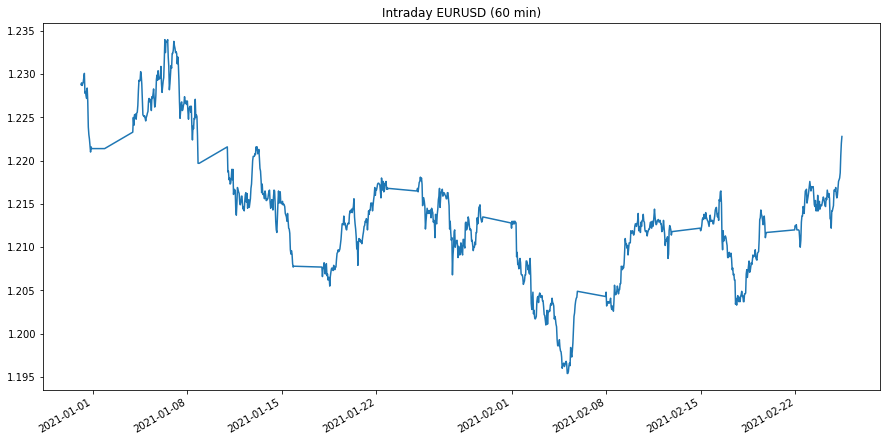

In [231]:
plt.subplots(figsize=(15, 7.5))
intraday_EURUSD['4. close'].plot()
plt.title('Intraday EURUSD (60 min)')
plt.show()

Beautiful!

# With this, good bey. 

# If you enjoyed, make sure to join me.